# <h1 style='color:blue'> Mobile Price Classification Project</h1>
***
The aim of the project is to classify smartphones' prices based on their features.\
It is a classification task as the prediction for each instance will be either 0, 1, 2 or 4 (low, medium, high, very high price)
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [3]:
train, test = pd.read_csv(os.path.join('train.csv')), pd.read_csv(os.path.join('test.csv'))

<h1 class='alert-warning'>first look at dataset</h1>

In [4]:
print('train set has {} observations'.format(len(train)))
print('test set has {} observations'.format(len(test)))

train set has 2000 observations
test set has 1000 observations


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [10]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


<div class="alert-info">

First observations:
- the label ***price_range*** is not included in test set
- the test set has an *id* column which is not present in train set
- there are no missing data
- all features are numerical (or already encoded anyway)
- features have very different scales
</div>

In [12]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<div class="alert-info">

**Summary statistics**

an "average" smartphone has:
- a price between medium and high (the two extremes are low and very high)
- a battery power of 1238 mAh
- a front camera with 4.3 mega pixels and a primary camera of about 10 mega pixels
- an internal memory of 32 gigabytes
- 0.5 cm depth, 140 of weight, 12 cm screen height, 5.7 cm screen width
- more than 4 cores
- 645 px resolution height and 1251 width
- 2124 MB RAM

76% of smartphones have 3g while
there is balance between observations with and without: bluetooth, dual sim, 4g, touch screen
</div>

# <center style="color:blue">EXPLORATORY DATA ANALYSIS</center>

<h1 class='alert-warning'>Label Inspection</h1>

<AxesSubplot:>

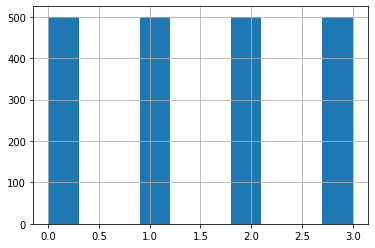

In [13]:
train.price_range.hist()

In [14]:
train.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

<div class='alert-info'>
there is a perfect balance on label categories
</div>

<h1 class="alert-warning">
Predictors' Histograms
</h1>

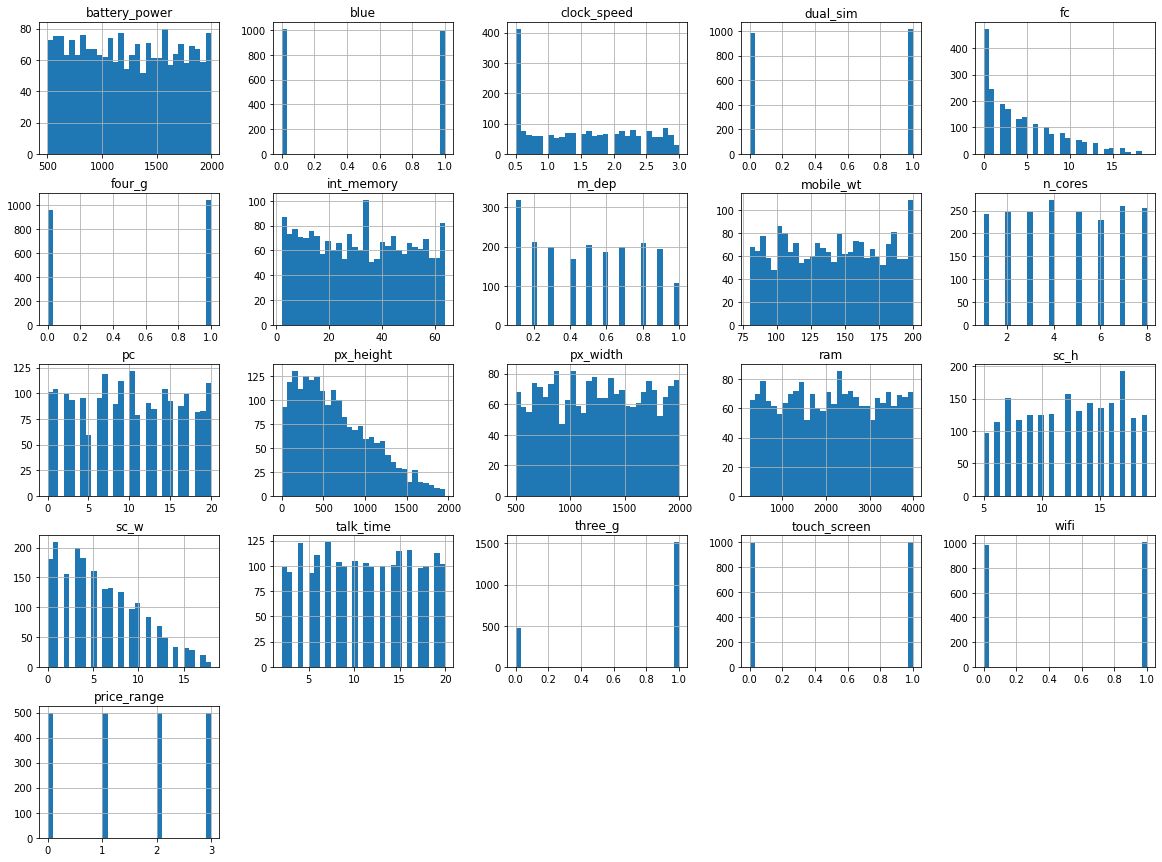

In [15]:
%matplotlib inline
train.hist(bins=30, figsize=(20,15))
plt.show()

<h1 class="alert-warning">
Exploring Correlations
</h1>

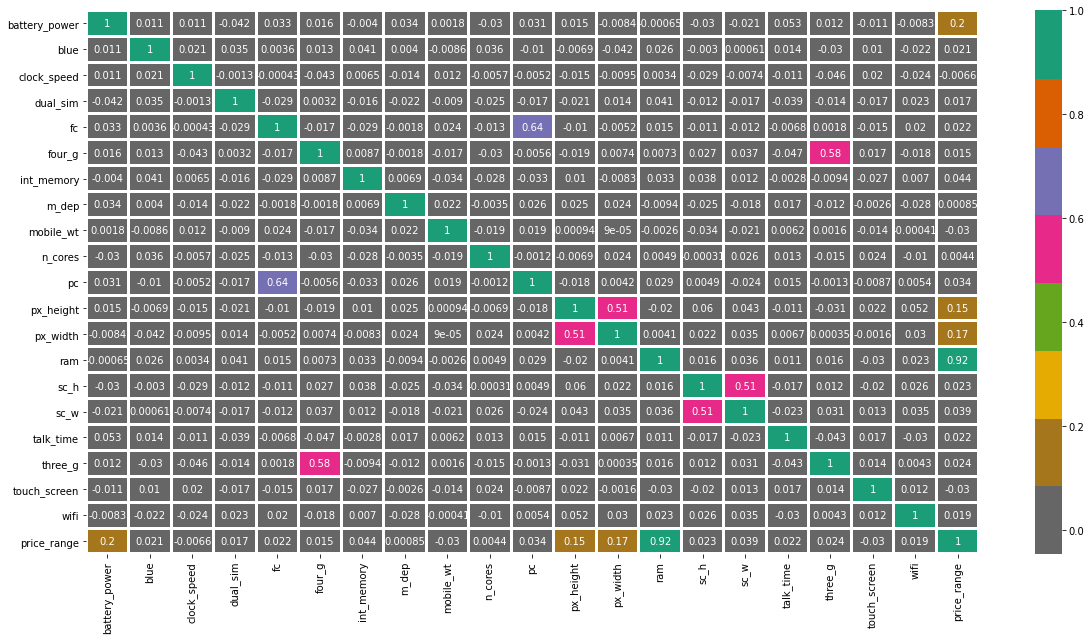

In [16]:
corr_matrix = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='Dark2_r', linewidths=2)
plt.show()

<div class="alert-info">
Since there are many weak correlations here, I am going to extract only the relevant ones and build a smaller but more useful matrix
</div>   

In [17]:
# only considering variables with at least one significant correlation value with another variable

variables = []
for variable in corr_matrix:
    if any(0.3 <= v < 1 or -1 < v <= -0.3 for v in corr_matrix[variable].values):
        variables.append(variable)

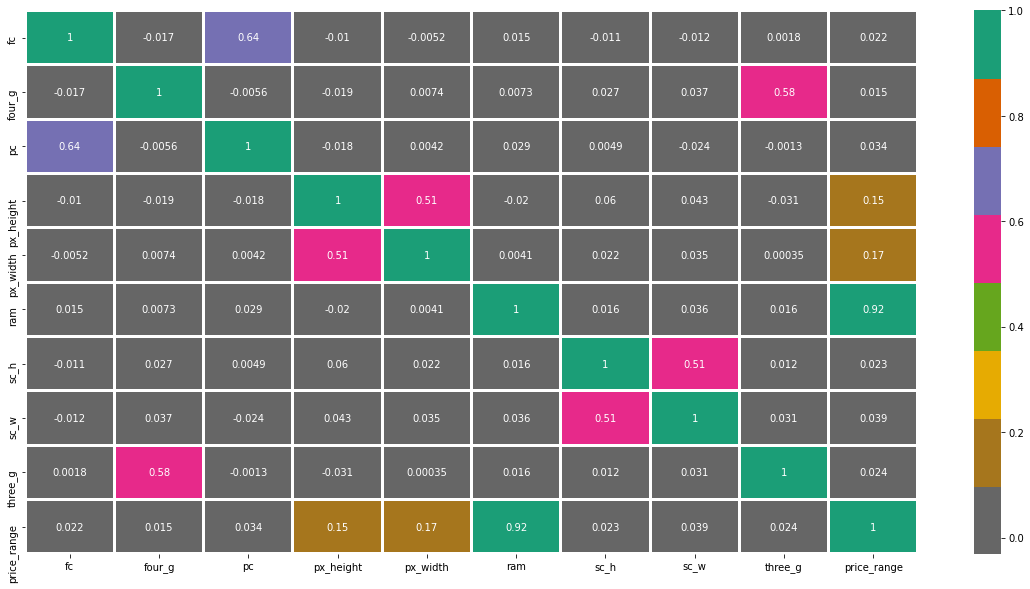

In [18]:
corr_matrix = train[variables].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='Dark2_r', linewidths=2)
plt.show()

<div class="alert-info">
Insights:
    
- we see a very strong positive correlation between **Ram** and **Price**: as the internal memory increases, price
also increases. This is by far the strongest correlation which means Ram is the best predictor of price.
- Another feature that has a positive (but pretty low) correlation with price is **battery power**, followed by **px width** and **px height**. 

- other moderate correlations are the ones between *px height* and *px width* and between *pc* and *fc* (front and primary camera). These pairs might be combined later on, reducing the four feature to only two, for example "dimension" and "camera".

</div>

<h1 class='alert-warning'> Deeper look at price - ram correlation</h1>

array([[<AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='price_range', ylabel='ram'>],
       [<AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='price_range', ylabel='price_range'>]],
      dtype=object)

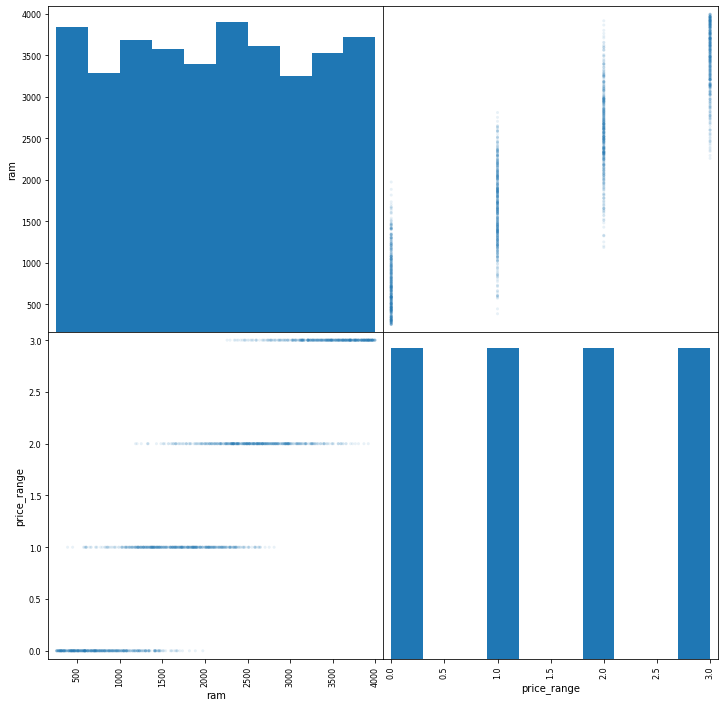

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(train[['ram','price_range']], alpha=0.1, figsize=(12,12))

<AxesSubplot:xlabel='price_range', ylabel='ram'>

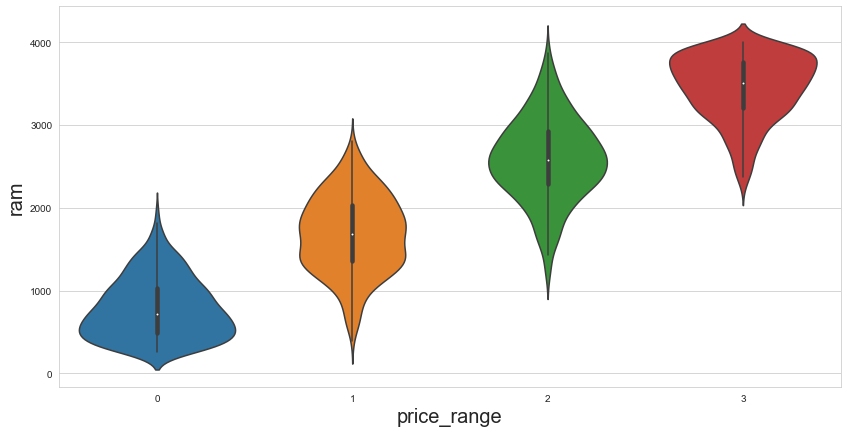

In [81]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
plt.xlabel('Price range', size=20)
plt.ylabel('Ram', size=20)
sns.violinplot(x='price_range', y='ram', data=train)

<div class="alert-info">
    
When the RAM is between 500 and 1000, it is usually a low cost mobile.\
When the RAM is between 1000 and about 2250, it is usually a medium price mobile.\
An high price mobile has a RAM between about 2250 and 3000.\
Lastly, RAM range for very expensive mobiles is usually over 3000.

**ram is expressed in MB*
</div>

In [68]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<h1 class='alert-warning'> Deeper look at other numerical features</h1>

Text(0, 0.5, 'battery power')

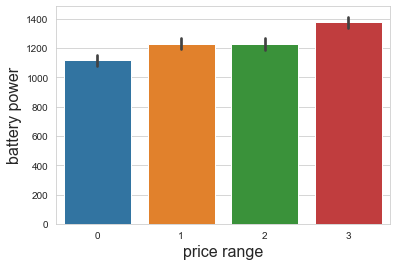

In [116]:
sns.barplot(x='price_range', y='battery_power', data=train)
plt.xlabel('price range',size=16)
plt.ylabel('battery power', size=16)

Text(0, 0.5, 'pixel height')

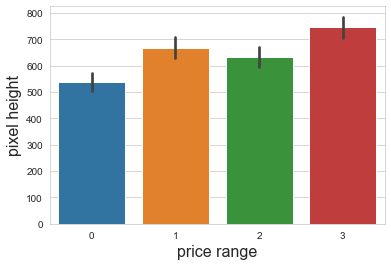

In [115]:
sns.barplot(x='price_range', y='px_height', data=train)
plt.xlabel('price range',size=16)
plt.ylabel('pixel height', size=16)

Text(0, 0.5, 'pixel width')

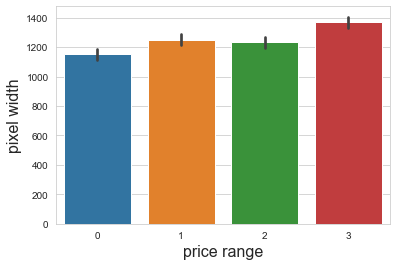

In [114]:
sns.barplot(x='price_range', y='px_width', data=train)
plt.xlabel('price range',size=16)
plt.ylabel('pixel width', size=16)

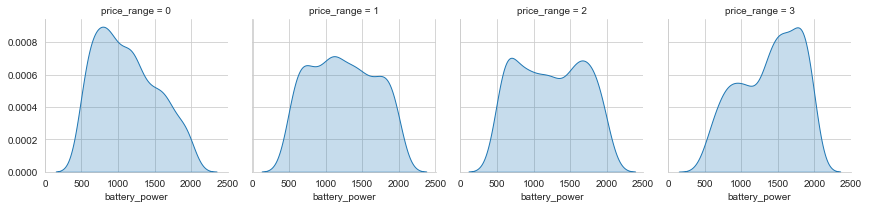

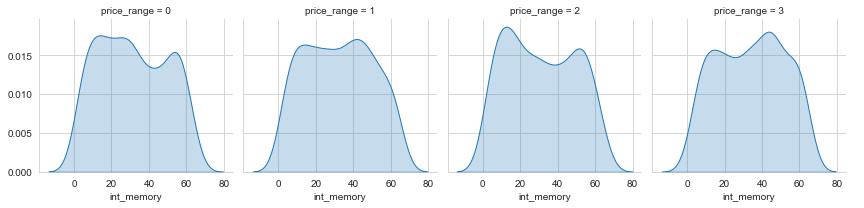

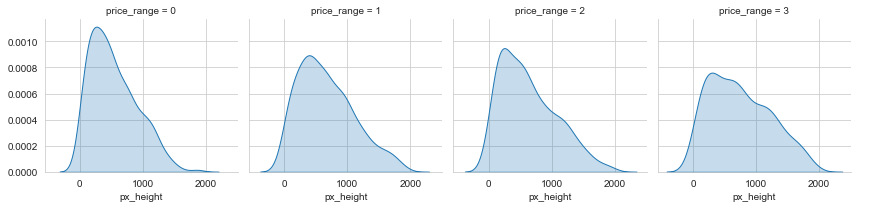

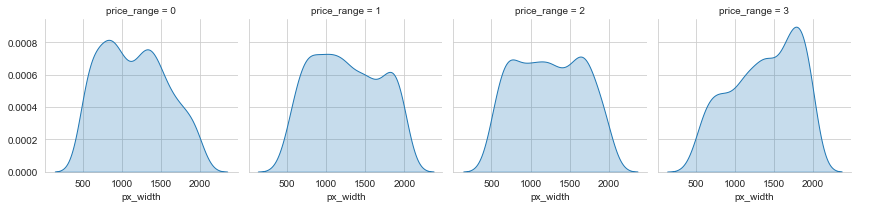

In [94]:
lookinto = ['battery_power', 'int_memory', 'px_height', 'px_width']

for feature in lookinto:
    g = sns.FacetGrid(train, col='price_range', height=3)
    g.map(sns.kdeplot, feature, shade=True).add_legend()

<div class='alert-info'>
    
after the exploratory data analysis, we see that there is one single predictor which is strongly correlated with label: it is *RAM*.\
However, there are some other positive low correlations with price range,
for example the one given by predictor *battery power*.

Looking at the previous bar plots (e.g. *price range* vs *battery power*), we see clear
differences between price range 0 (low price) and 3 (very high price), while the average
values of predictors for classes 1 and 2 (medium and high) are usually at the same intermediate level.

This is the reason why it would be nice to reduce the classes of the labels from four to two,
by combining low-medium into a *not expensive* class, and high-very high into an *expensive* class, then
training a Binary Classifier, making binary predictions, and lastly compare its performance to the performance of a Multiclass Classifier, trained on the original four-class dataset instead.
</div>

# <center style='color:blue'>Separating Labels and Predictors</center>

In [20]:
X_train = train.drop('price_range', axis=1)
y_train = train['price_range']

# <center style="color:blue">Training a Binary Classifier</center>
<center>which classifies each instance as expensive (1) or not (0)</center>

In [21]:
# the first thing is converting the four-class label into a boolean True-False
y_train_expensive = (y_train > 1)  # class 2 and 3 will be considered as expensive (value True)
y_train_expensive.value_counts()

False    1000
True     1000
Name: price_range, dtype: int64

<h1 class='alert-warning'>transformation pipeline</h1>

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [23]:
X_train = pipeline.fit_transform(X_train)
X_train.shape

(2000, 20)

<h1 class='alert-success'>SGD Classifier</h1>

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_expensive)

SGDClassifier(random_state=42)

In [25]:
# using the model to predict if mobiles are expensive or not
sgd_clf.predict([X_train[0]])

array([False])

In [26]:
y_train_expensive[0]

False

<div class="alert-info">
the binary classifier correctly classified the first observation as not expensive
</div>   

## Accuracy of the Binary Classifier

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_expensive, cv=3, scoring='accuracy').mean()

0.9799942371156765

<div class="alert-info">

about 98% accuracy

Let's check confusion matrix to better evaluate the classifier 
</div>    

## Confusion matrix of Binary Classifier

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# we still use cross validation 
# but this time we use predictions on each test fold (not scores) in order to build the confusion matrix
y_train_expensive_pred = cross_val_predict(sgd_clf, X_train, y_train_expensive, cv=3)
cm_expensive = confusion_matrix(y_train_expensive, y_train_expensive_pred)
cm_expensive

array([[977,  23],
       [ 17, 983]], dtype=int64)

<div class='alert-info'>
    
upper left are true negatives\
bottom right are true positives\
upper right are false positives\
bottom left are false negatives
</div>          

In [29]:
print("{} true positives".format(cm_expensive[1,1]))
print("{} true negatives".format(cm_expensive[0,0]))
print("{} false positives".format(cm_expensive[0,1]))
print("{} false negatives".format(cm_expensive[1,0]))

983 true positives
977 true negatives
23 false positives
17 false negatives


## precision, recall, f1 score of Binary Classifier

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

ps_expensive = precision_score(y_train_expensive, y_train_expensive_pred)  # accuracy of positive predictions
rs_expensive = recall_score(y_train_expensive, y_train_expensive_pred)  # ratio of positives detected
print('precision score is {} %'.format(ps_expensive*100))
print('recall score is {} %'.format(rs_expensive*100))
f1s_expensive = f1_score(y_train_expensive, y_train_expensive_pred)
print('f1 score is {} %'.format(f1s_expensive*100))

precision score is 97.71371769383698 %
recall score is 98.3 %
f1 score is 98.00598205383848 %


### let's look at decision scores for some observations

In [31]:
# first let's return some predictions
some_pred = sgd_clf.predict(X_train[:5])
some_pred

array([False,  True,  True,  True, False])

In [32]:
y_train_expensive[:5]

0    False
1     True
2     True
3     True
4    False
Name: price_range, dtype: bool

<div class="alert-info">
we see that the first 5 predictions are correct
</div>   

In [33]:
# returning the decision score of the first 5 observations
some_scores = sgd_clf.decision_function(X_train[:5])
some_scores

array([-7.84346936, 16.04449127,  9.99409889, 15.04477712, -3.38585477])

<div class="alert-info">

each score is computed by a decision function.
If the score is greater than the threshold, the instance gets classified as positive (in this case True).\
The threshold here is default zero
</div>    

In [34]:
# let's now modify the threshold, raising it from zero (what SGD uses) to 10
threshold = 10
some_pred = (some_scores > threshold)
some_pred

array([False,  True, False,  True, False])

<div class="alert-info">

we see that raising the threshold from 0 to 10 reduces the recall,\
since now the third observation gets classified as not expensive,\
while it should have been classified as expensive.\
In other words, by raising the threshold, we fail to detect a positive (expensive) observation (mobile)
</div>   

## The Precision Recall trade-off 
plotting threshold values vs precision and recall

In [35]:
y_expensive_scores = cross_val_predict(sgd_clf, X_train, y_train_expensive, cv=3, method='decision_function')
y_expensive_scores  # all scores

array([ -6.66109402,  15.42095471,   8.18579261, ...,  51.44278319,
       -48.33810088,  39.25669565])

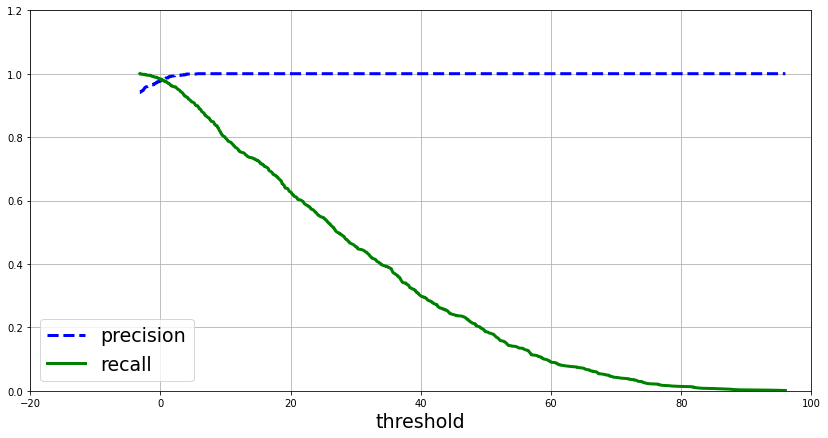

In [36]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_expensive, y_expensive_scores)

def plot_precision_and_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision', linewidth=3)
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall', linewidth=3)
    plt.xlabel('threshold', fontsize=19)
    plt.legend(loc='lower left', fontsize=19)
    plt.axis([-20,100,0,1.2])
    plt.grid()
    
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precisions, recalls, thresholds)
plt.show()

<div class="alert-info">

We see how increasing the threshold will reduce recall.\
However, there is no point here in increasing the threshold above zero, since the precision 
is already maximized, while recall would keep going down.\
At 0 threshold, precision and recall are very high, around 98 %.\
We might raise the threshold a little bit above zero just to get the maximum precision, but this will then reduce the recall.
</div>    

# The ROC Curve
plotting true positive rate (recall/sensitivity) vs false positive rate (1 - specificity)

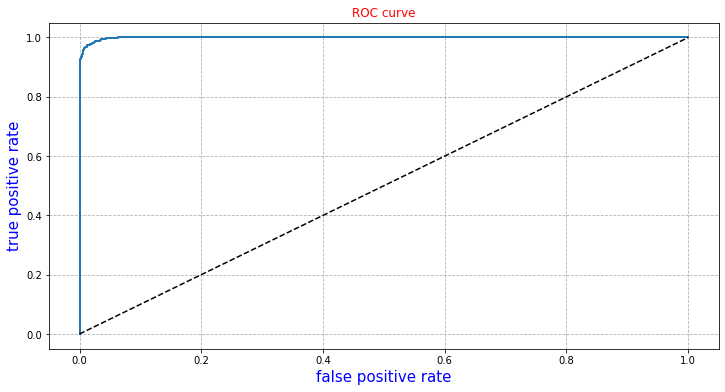

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_expensive, y_expensive_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.grid(linestyle='--')
    plt.title("ROC curve", color='red')
    plt.xlabel("false positive rate", color='blue', size=15)
    plt.ylabel("true positive rate", color='blue', size=15)
    
plt.figure(figsize=(12, 6))                                   
plot_roc_curve(fpr, tpr)
plt.show()

<div class="alert-info">

we see that the model has good performance since the blue curve almost touches the upper left corner.
    
Here is the *tradeoff*: increasing the recall above 0.98 will produce more false positives.\
However, at 0.98 the recall is already almost perfect and there is no great benefit of increasing it further.

Let's calculate the area under the curve (ROC AUC score):
</div>

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train_expensive, y_expensive_scores)
roc_auc

0.998901

<div class='alert-info'>
    
the ROC AUC score confirms the good performance of the model, since a perfect model has an area of 1,\
while a random classifier would have an area of 0.5 (the area below the diagonal line).
</div>

<h1 class='alert-success'>Random Forest Classifier</h1>

comparing ROC curve with previous classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probs = cross_val_predict(forest_clf, X_train, y_train_expensive, cv=3, method='predict_proba')
y_probs

array([[0.35, 0.65],
       [0.14, 0.86],
       [0.15, 0.85],
       ...,
       [0.05, 0.95],
       [0.92, 0.08],
       [0.17, 0.83]])

<div class='alert-info'>
    
first column is probability of that instance belonging to class 0 (not expensive)\
second column is probability of belonging to class 1 (expensive)
</div>

In [40]:
# to plot ROC curve, we can pass class probabilities instead of scores
# for this reason we get the positive class probabilities
y_expensive_scores_forest = y_probs[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_expensive, y_expensive_scores_forest)

<div class="alert-info">

plotting previous SGD Classifier ROC curve together with the new (Forest Classifier) ROC curve:
</div>   

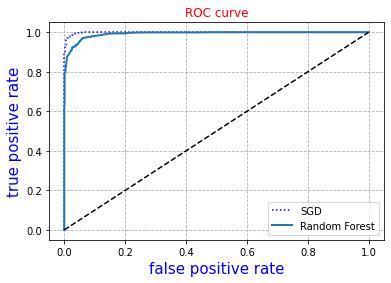

<Figure size 1080x432 with 0 Axes>

In [41]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')  # third argument is the label, by default None
plt.legend(loc='lower right')
plt.figure(figsize=(15,6))
plt.show()

<div class="alert-info">

the Random Forest Classifier seems to perform slightly worse than the SGD Classifier:\
its curve is further from the upper left corner than the SGD curve.

Let's confirm that by calculating ROC AUC score for Random Forest:
</div>    

In [42]:
roc_auc_forest = roc_auc_score(y_train_expensive, y_expensive_scores_forest)
roc_auc_forest

0.9922415000000001

In [43]:
confirmation = (roc_auc > roc_auc_forest)  # directly comparing the two roc auc measures
print('is ROC AUC of SGD greater than Random Forest? {}'.format(confirmation))

is ROC AUC of SGD greater than Random Forest? True


<div class="alert-info">

Let's also have a look at precision and recall for Random Forest:
</div>

In [44]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_expensive, cv=3)

ps_expensive_forest = precision_score(y_train_expensive, y_train_pred_forest)  # accuracy of positive predictions
rs_expensive_forest = recall_score(y_train_expensive, y_train_pred_forest)  # ratio of positives detected
print('Random forest precision score is {} %'.format(ps_expensive_forest*100))
print('Random forest recall score is {} %'.format(rs_expensive_forest*100))

Random forest precision score is 95.26686807653574 %
Random forest recall score is 94.6 %


<div class="alert-info">

and finally, F1 score for Random Forest:
</div>

In [45]:
f1s_expensive_forest = f1_score(y_train_expensive, y_train_pred_forest)
print('f1 score is {} %'.format(f1s_expensive_forest*100))

f1 score is 94.93226292022078 %


In [46]:
confirmation_bis = (f1s_expensive > f1s_expensive_forest)  # directly comparing the two f1 measures
print('is F1 score of SGD greater than Random Forest? {}'.format(confirmation_bis))

is F1 score of SGD greater than Random Forest? True


<h1 class='alert-warning'>summarizing performances</h1>

In [65]:
results = pd.DataFrame({
    'Model': ['SGD', 'Random Forest'],
    'ROC AUC Score': [roc_auc, roc_auc_forest],
    'precision': [ps_expensive, ps_expensive_forest],
    'recall': [rs_expensive, rs_expensive_forest],
    'f1 score': [f1s_expensive, f1s_expensive_forest]
})

results_df = results.sort_values(by='ROC AUC Score', ascending=False)
#results_df = results_df.set_index('ROC AUC Score')
results_df.head()

,Model,ROC AUC Score,precision,recall,f1 score
0,SGD,0.998901,0.977137,0.983,0.980060
1,Random Forest,0.992242,0.952669,0.946,0.949323


# <center style='color:blue'> Applying Binary Classifier to test set </center>
<center>SGD Classifier is chosen</center>

In [47]:
test.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [48]:
# removing id column
test = test.drop('id', axis=1)
test.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


In [49]:
# transforming test set
X_test = pipeline.fit_transform(test)
X_test.shape

(1000, 20)

In [50]:
# making predictions
binary_predictions = sgd_clf.predict(X_test)
binary_predictions[:5]  # first 5 predictions

array([ True,  True,  True,  True, False])

<div class="alert-info">
first four instances get classified as expensive, fifth as not expensive.</div>

# <center style='color:blue'>Training a Multiclass Classifier</center>
<center>using the original dataset in order to classify instances into one of the four possible categories</center>


In [51]:
y_train.value_counts()  # we will use this labels now to fit models

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

### trying a few models (LR, RF, SVM, SGD)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [53]:
models = [('Logistic Regression', LogisticRegression()), ('Random Forest Classifier', RandomForestClassifier()),
          ('Support Vector Machine Classifier', SVC()), ('Stochastic Gradient Descent Classifier', SGDClassifier())]

In [54]:
for model in models:
    mean_score = cross_val_score(model[1], X_train, y_train, cv=3, scoring='accuracy').mean()
    print('{} accuracy: {}'.format(model[0], mean_score))

Logistic Regression accuracy: 0.956001728865297
Random Forest Classifier accuracy: 0.8739946843395119
Support Vector Machine Classifier accuracy: 0.8679909294601948
Stochastic Gradient Descent Classifier accuracy: 0.774500137318728


<div class="alert-info">

Logistic Regressor gives the best performance through cross validation.\
Let's give a deeper look at the error it made:
</div>

<h1 class='alert-warning'> Error Analysis </h1>

of Logistic Regressor

In [55]:
y_train_pred = cross_val_predict(LogisticRegression(), X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[485,  15,   0,   0],
       [ 20, 466,  14,   0],
       [  0,  16, 469,  15],
       [  0,   0,   8, 492]], dtype=int64)

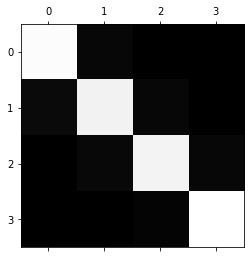

In [56]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

<div class="alert-info">
Let's get error rates instead of absolute errors:
</div>

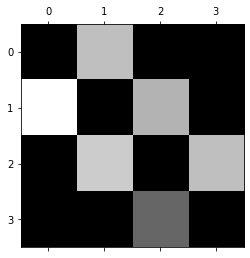

In [57]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm/row_sums  # getting rates
np.fill_diagonal(norm_cm, 0)  # filling diagonal with zeros to focus only on errors
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.show()

<div class='alert-info'>
            
Rows represent actual classes, columns predicted classes.

Insights from matrix:
- the brightest cell is second row, first column, which corresponds to class 1 being classified as class 0. This means
that several medium price mobiles got misclassified as low price.
- another brighter cell is for example (2,1), which corresponds to high price instances being misclassified as medium price.  
            
</div>

In [58]:
norm_cm  # viewing error rates as values

array([[0.   , 0.03 , 0.   , 0.   ],
       [0.04 , 0.   , 0.028, 0.   ],
       [0.   , 0.032, 0.   , 0.03 ],
       [0.   , 0.   , 0.016, 0.   ]])

<h1 class='alert-warning'> Hyperparameters tuning </h1>

for Logistic Regressor

In [59]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid=grid_values)
grid_search.fit(X_train, y_train)

C:\Users\aldot\Envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aldot\Envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aldot\Envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aldot\Envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\aldot\Envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test par

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [60]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [61]:
best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='accuracy')
scores.mean()

0.9659989824907367

<div class="alert-info">
Performance of Logistic Regressor slightly increased after tuning its hyperparameters

# <center style='color:blue'> Applying Mutliclass Classifier to test set </center>
<center>Logistic Regressor is chosen</center>

In [62]:
# making predictions
multi_predictions = best_model.predict(X_test)
multi_predictions[:5]  # first 5 predictions

array([3, 3, 2, 3, 1], dtype=int64)

<div class="alert-info">
first four instances get classified as: very high price, very high price, high price and medium price.</div>